The critical radius is 0.1105 m
The mass of the sphere has to be bigger than 106 kg
We work with a sphere of radius 0.111 m


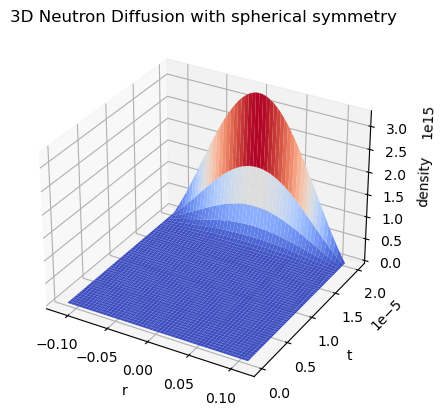

In [1]:
#3D Analysis w/ spherical coordinates and Dirichlet Boundary Condition

# We are studying the neutron diffusion in 3-dimensions and with spherical symmetry. 
# This does not represent a physical situation due to the Dirchlet Boundary Condition.  
# We find the critical dimension (radius of the sphere) of the fissile material, its critical mass and
# the evolution of the neutron density as a function of time.
# 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource, Normalize
import scipy.integrate as spi
import scipy.special as sc
from mpl_toolkits import mplot3d
from matplotlib import cm

# Parameters from an external file .txt
file1 = open('/Users/enrico.perboni14/Desktop/Tesi Magistrale/Uranium235.txt', "r")
read_content = file1.readlines()[0 : 4]
values = list(range(4))
for i in range(0,4):
    values[i] = read_content[i].split()
for i in range(0,4):
    exec("%s = %f" % (values[i][0],float(values[i][2])))
file1.close()
    
#Spherical coordinates w/ Dirichlet boundary conditions; here it's considered the problem with spherical symmetry

radius_critical = np.pi*np.sqrt(mu/eta)  
volume_critical = np.pi*4/3*radius_critical**3
critical_sphere_mass = rho*volume_critical
r_sphere = round(radius_critical, 3) + 0.001
print('The critical radius is', round(radius_critical, 4), 'm')
print('The mass of the sphere has to be bigger than', round(critical_sphere_mass), 'kg')
print('We work with a sphere of radius',r_sphere, 'm') 

# Setting the maximum value of the time
T_sph = 2e-5

# Fourier coefficients computation
initial_condition_sphere = lambda r : (1-(r**2/r_sphere**2)) #Dirichlet boundary conditions

def integrand_Fourier_sphere(r): # integrand for the Fourier coefficients
    return 2/r_sphere*r*initial_condition_sphere(r)*np.sin(p*np.pi*r/r_sphere)

tupla_coefficient_sphere = np.zeros(30, dtype = tuple)

for i in range(tupla_coefficient_sphere.size):
    p = i + 1
    tupla_coefficient_sphere[i] = spi.quad(integrand_Fourier_sphere, 0, r_sphere)

float_coefficients_sphere = np.zeros(30, dtype = float)
for i in range(float_coefficients_sphere.size):
    p = i + 1
    float_coefficients_sphere[i] = tupla_coefficient_sphere[i][0]    

def neutron_density_sphere(t,r):
    neutron_density_sphere = 0
    for j in range(float_coefficients_sphere.size):
        p = j + 1
        neutron_density_sphere += float_coefficients_sphere[j]/r*np.exp(eta*t - mu*p**2*np.pi**2*t/r_sphere**2)*np.sin(p*np.pi*r/r_sphere)
    return neutron_density_sphere

# Plotting the data
neutron_diffusion_sphere_plot = plt.figure()
ax = plt.axes(projection = '3d')
r = np.linspace(-r_sphere, r_sphere, 1000)
t = np.linspace(0, T_sph, 1000)
R, T = np.meshgrid(r,t)
N = neutron_density_sphere(T, R)
surf = ax.plot_surface(R,T , N, cmap=cm.coolwarm,
               linewidth=1)
ax.set_xlabel('r')
ax.set_ylabel('t')
ax.set_zlabel('density')
ax.set_title('3D Neutron Diffusion with spherical symmetry')
plt.show()